## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 11
---------------------------------------

GOALS:

1. Understand Causal vs Experimental Studies
2. Do a more free form data analysis
3. Start doing your ethics reading

----------------------------------------------------------

This homework has **2 questions**, **10 exercises** and **1 essay response**.

In [414]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [415]:
file_name = 'data/yougov-climate.csv'
DF = pd.read_csv(file_name,index_col=0)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know
country,,,,,
GB,833,604,49,33,114
US,507,493,120,80,133


In the lecture we analyzed the following questions for the first column in the data:

### First question:

What percent of **all respondents** think the climate is changing and human activity is mainly responsible?

### Second question:

What percent of **GB respondents** think the climate is changing and  human activity is mainly responsible?  

### Third Question

What percent of **US respondents** think the climate is changing and  human activity is mainly responsible?  

**Q1** Repeat the analysis from the lecture notes for one of the other columns/questions.

1. Percent total
2. Percent from GB
3. Percent from US

Talk about the conditional probability in this case:

eg. In a person is from ________ then there is a ________ probability that they believe _______. If a person answered _______ then they are more likley to be from ________. 

In [417]:
DF.loc['total']= DF.sum(axis=0)
DF['total'] = DF.sum(axis=1)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know,total
country,,,,,,
GB,833,604,49,33,114,1633
US,507,493,120,80,133,1333
total,1340,1097,169,113,247,2966


### First question:

In [419]:
# under column 'total', locate value in row 'total'
all_respondents = DF['total'].loc['total']
# under specified column, find value in row 'total'
human_responsible = DF['The climate is not changing  ']['total']
human_responsible/all_respondents

0.03809844908968307

**3.8% of all respondents think climate is changing and human activity is mainly responsible.**

### Second question:

In [422]:
gb_respondents = DF['total'].loc['GB']
GB_human_responsible = DF['The climate is not changing  ']['GB']
GB_human_responsible/gb_respondents

0.02020820575627679

**2.0% of Great Birtain respondents think climate is changing and human activity is mainly responsible.**

In [424]:
us_respondents = DF['total'].loc['US']
US_human_responsible = DF['The climate is not changing  ']['US']
US_human_responsible/us_respondents

0.06001500375093773

**6.0% of United States respondents think climate is changing and human activity is mainly responsible.**

**In a person is from Great Britain then there is a 2.0% probability that they believe the climate is not changing. If a person answered the climate is not changing, then they are more likley to be from the United States (6.0% probability).**

## Berkeley admission data example

- Study carried out by the Graduate Division of the University of California, Berkeley in the early 70’s to evaluate whether there was a gender bias in graduate admissions.
- The data come from six departments. For confidentiality we'll call them A-F. 
- We have information on whether the applicant was male or female and whether they were admitted or rejected. This is an old study so only two binary classifications were used. 

### Here is the data


In [428]:
file_name = 'data/berkley.csv'
DF = pd.read_csv(file_name)
show(DF)

In [429]:
# melts gender and admission data into a column, indexes by 'Department'
DF_melt = pd.melt(DF,id_vars=['Department'],var_name='MF',value_name='Number')
DF_melt

,Department,MF,Number
0,A,Male Yes,512
1,B,Male Yes,353
2,C,Male Yes,120
3,D,Male Yes,138
4,E,Male Yes,53
5,F,Male Yes,22
6,A,Male No,313
7,B,Male No,207
8,C,Male No,205
9,D,Male No,279


In [430]:
# splits 'MF' into 'gender' and 'admitted'
DF_melt['gender'] = DF_melt['MF'].apply(lambda x: x.split(' ')[0]).copy()
DF_melt['admitted'] = DF_melt['MF'].apply(lambda x: x.split(' ')[1]).copy()

In [431]:
DF_melt

,Department,MF,Number,gender,admitted
0,A,Male Yes,512,Male,Yes
1,B,Male Yes,353,Male,Yes
2,C,Male Yes,120,Male,Yes
3,D,Male Yes,138,Male,Yes
4,E,Male Yes,53,Male,Yes
5,F,Male Yes,22,Male,Yes
6,A,Male No,313,Male,No
7,B,Male No,207,Male,No
8,C,Male No,205,Male,No
9,D,Male No,279,Male,No


### Gender distribution by department

What can we say about the gender distribution if we look at the individual departments.

Start with our original "melted" data frame:

#### Lets pivot!

Pivot this data so that our departments become the column labels and our MF column becomes the index.

In [434]:
DF_new = DF_melt.pivot(index='MF', columns='Department',values='Number')
DF_new

Department,A,B,C,D,E,F
MF,,,,,,
Female No,19,8,391,244,299,317
Female Yes,89,17,202,131,94,24
Male No,313,207,205,279,138,351
Male Yes,512,353,120,138,53,22


In [435]:
total_fem = DF_new['A']['Female Yes'] + DF_new['A']['Female No']
prob_fem = DF_new['A'].loc['Female Yes']/total_fem
total_male = DF_new['A']['Male Yes'] + DF_new['A']['Male No']
prob_male = DF_new['A'].loc['Male Yes']/total_male

In [436]:
prob_fem

0.8240740740740741

In [437]:
prob_male

0.6206060606060606

**Q2** Calculate the proportions for the other departments. We did department A in the lecture. You can use the code from the lecture or come up with your own way to do this. You can do this one by one or try using a FOR loop.

Talk about what you see in these proportions. Which departments admit a large number of women? How do your number align with the visualization below?

In [439]:
for x in DF_new:
    total_fem = DF_new[x]['Female Yes'] + DF_new[x]['Female No']
    prob_fem = DF_new[x].loc['Female Yes']/total_fem
    total_male = DF_new[x]['Male Yes'] + DF_new[x]['Male No']
    prob_male = DF_new[x].loc['Male Yes']/total_male

    print(x + " prob_fem = ")
    print(prob_fem)
    print(x + " prob_male = ")
    print(prob_male)

A prob_fem = 
0.8240740740740741
A prob_male = 
0.6206060606060606
B prob_fem = 
0.68
B prob_male = 
0.6303571428571428
C prob_fem = 
0.3406408094435076
C prob_male = 
0.36923076923076925
D prob_fem = 
0.34933333333333333
D prob_male = 
0.33093525179856115
E prob_fem = 
0.23918575063613232
E prob_male = 
0.2774869109947644
F prob_fem = 
0.07038123167155426
F prob_male = 
0.058981233243967826


**Departments A, B, D, and F admit a larger number of women than men. My calculations align with the histogram. We should note that some of the differences in proportions are rather miniscule.**

### Here is a plot of the proportions data

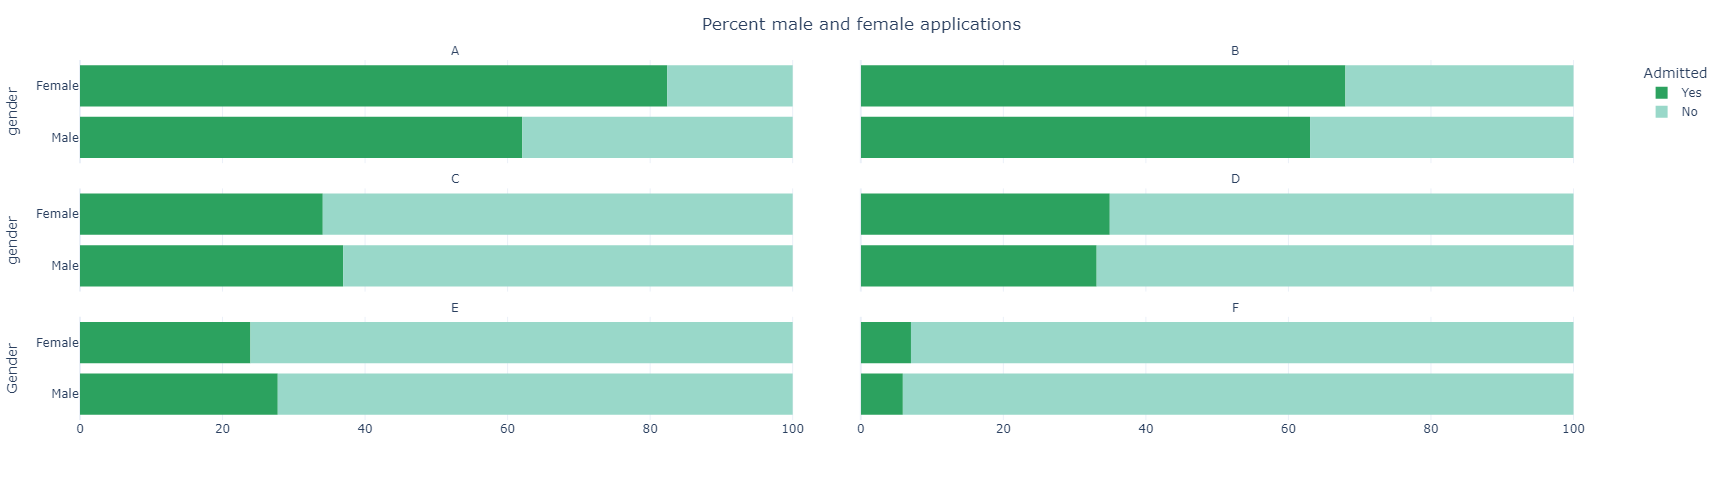

In [442]:
fig = px.histogram(DF_melt,
                   y='gender',
                   x='Number',
                   barnorm = "percent",
                   color='admitted',
                   facet_col='Department',
                   facet_col_wrap=2,
                   color_discrete_map = {'No':'#99d8c9','Yes':'#2ca25f'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(title_text='')

fig.update_layout(title='Percent male and female applications',
                  title_x=0.5,
                  template="plotly_white",
                  xaxis_title="",
                  yaxis_title="Gender",
                  legend_title='Admitted',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

------------------------
------------------------

## Homework - Exercises

** Homework content and data from Data Science in a Box - he-05-legos.Rmd

This week we'll do some data gymnastics to refresh and review what we learned over the past few weeks using (**simulated**) data from Lego sales in 2018 for a sample of customers who bought Legos in the US. This is different than the data we used on the Exam!


### Data

In [444]:
file_name = 'data/lego-sales.csv'
DF = pd.read_csv(file_name)
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2


### Exercises

* Answer the following questions using reproducible Python code.
* For each question, state your answer in a sentence, e.g. "In this sample, the first three common names of purchasers are ...".
* Note that the answers to all questions are within the context of this particular sample of sales, i.e. you shouldn't make inferences about the population of all Lego sales based on this sample.

-------------

1.  Describe what you see in the data set (variables, observations, etc)

2.  What are the three most common first names of purchasers?

3.  What are the three most common themes of Lego sets purchased?

4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

5.  Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks and create separate data frames -OR- create a new column with these categorical labels (more advanced).

6.  Which age group has purchased the highest number of Lego sets.

7.  Which age group has spent the most money on Legos?

8.  Which Lego theme has made the most money for Lego? HINT: Simpler than #5, just use a groupby()

9.  Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. HINT: You will need to split the phone number and get just the first three. You decided what to do about reporting the NaNs.

10.  Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

### Number 1

In [447]:
DF.shape

(620, 14)

**In this sample, there are 620 observations and 14 variables.**

### Number 2

In [450]:
DF['first_name'].value_counts()

first_name
Jackson       13
Joseph        11
Jacob         11
Michael       10
Kaitlyn        8
              ..
Gunnar         1
David          1
Lawrence       1
John'Dunae     1
Kimberly       1
Name: count, Length: 211, dtype: int64

**In this sample, the three most common first names of purchasers are Jackson, Joseph, and Jacob.**

### Number 3

In [453]:
DF['theme'].value_counts()

theme
Star Wars                  75
Nexo Knights               64
Gear                       55
Mixels                     55
City                       45
Friends                    42
Ninjago                    38
Duplo                      35
Bionicle                   34
Creator                    25
DC Comics Super Heroes     22
Elves                      22
Marvel Super Heroes        19
Dimensions                 18
Disney Princess            15
The Angry Birds Movie      11
Technic                    10
Architecture               10
Minecraft                   9
Advanced Models             4
Ghostbusters                3
Seasonal                    3
Collectable Minifigures     3
Ideas                       2
Classic                     1
Name: count, dtype: int64

**In this sample, the three most common themes purhcased are Star Wars, Nexo Knights, and Gear and Mixels tied for third.**

### Number 4

In [456]:
mask = DF['theme'] == 'Star Wars'
DF[mask]['subtheme'].value_counts()

subtheme
The Force Awakens            15
Buildable Figures            11
Episode V                    10
MicroFighters                10
Battlefront                   7
Original Content              7
Episode III                   6
Rebels                        3
Seasonal                      3
Episode IV                    2
Ultimate Collector Series     1
Name: count, dtype: int64

**In this sample, the most common subtheme of the most common theme purchased (Star Wars) is The Force Awakens.**

### Number 5

In [459]:
DF['age'].max()

68

In [460]:
#mask18 = (DF['age'] <= 18)
#mask19_25 = (DF['age'] >= 19) & (DF['age'] <= 25)
#mask26_35 = (DF['age'] >= 26) & (DF['age'] <= 35)
#mask36_50 = (DF['age'] >= 36) & (DF['age'] <= 50)
#mask51 = (DF['age'] >= 51)

# pd.cut creates new categorical column that fills with conditional data
DF['age_category'] = pd.cut(DF['age'], bins=[0, 18, 25, 35, 50, 68], labels=['18-','19-25','26-35','36-50','51+'])
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_category
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1,19-25
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,26-35
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1,26-35
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1,36-50
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2,18-
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2,26-35
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1,26-35
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2,36-50


### Number 6

In [462]:
DF['age_category'].value_counts()

age_category
36-50    216
26-35    183
19-25    129
51+       62
18-       30
Name: count, dtype: int64

**In this sample, 36-50 year olds is the age group that has purchased the highest number of Lego sets.**

### Number 7

In [465]:
# groups DF by 'age_category', finds sum of us_price of each category, sorts high to low
my_cols = ['age_category','us_price']
DF[my_cols].groupby(['age_category'], as_index=False).sum().sort_values('us_price', ascending=False)

,age_category,us_price
3,36-50,6641.84
2,26-35,5260.17
1,19-25,3629.71
4,51+,1832.38
0,18-,641.70


**In this sample, 36-50 year olds is the age group that has spent the most money on Legos.**

### Number 8

In [468]:
my_cols = ['theme','us_price']
DF[my_cols].groupby('theme', as_index=False).sum().sort_values('us_price', ascending=False)

,theme,us_price
22,Star Wars,2842.25
20,Ninjago,1649.62
19,Nexo Knights,1569.36
3,City,1476.55
17,Minecraft,1439.91
13,Gear,1056.45
12,Friends,924.58
10,Duplo,854.65
11,Elves,809.78
0,Advanced Models,679.96


**In this sample, the Star Wars theme has made the most moeny for Lego.**

### Number 9

In [471]:
# replaces NaN in 'phone_number' column with ''
DF['phone_number'] = DF['phone_number'].fillna('')

In [472]:
# hides observations with no value in column 'phone_number'
mask = (DF['phone_number'] != '')
DF_mask = DF[mask]

In [473]:
# creates column 'area_code' that contains first 3 digits of column 'phone_number'
DF_mask['area_code'] = DF_mask['phone_number'].apply(lambda x: x.split('-')[0])
show(DF_mask)

In [474]:
# groups by 'area_code', takes sum of prices in each area code, sorts from high to low
my_cols = ['area_code','us_price']
DF_mask[my_cols].groupby(['area_code']).sum().sort_values('us_price', ascending=False)

,us_price
area_code,
973,444.94
281,434.91
956,359.98
209,329.95
567,326.91
...,...
216,9.99
509,9.99
325,9.98


**In this sample, the 973 area code spent the most money on Legos.**

### Number 10

**Question: Are certain themes more popoular for certain ages?**

In [539]:
my_cols = ['theme','quantity','age_category']
show(DF[my_cols].groupby(['age_category', 'theme'], as_index=False).sum())

In [686]:
DF['theme'].value_counts().keys()

Index(['Star Wars', 'Nexo Knights', 'Gear', 'Mixels', 'City', 'Friends',
       'Ninjago', 'Duplo', 'Bionicle', 'Creator', 'DC Comics Super Heroes',
       'Elves', 'Marvel Super Heroes', 'Dimensions', 'Disney Princess',
       'The Angry Birds Movie', 'Technic', 'Architecture', 'Minecraft',
       'Advanced Models', 'Ghostbusters', 'Seasonal',
       'Collectable Minifigures', 'Ideas', 'Classic'],
      dtype='object', name='theme')

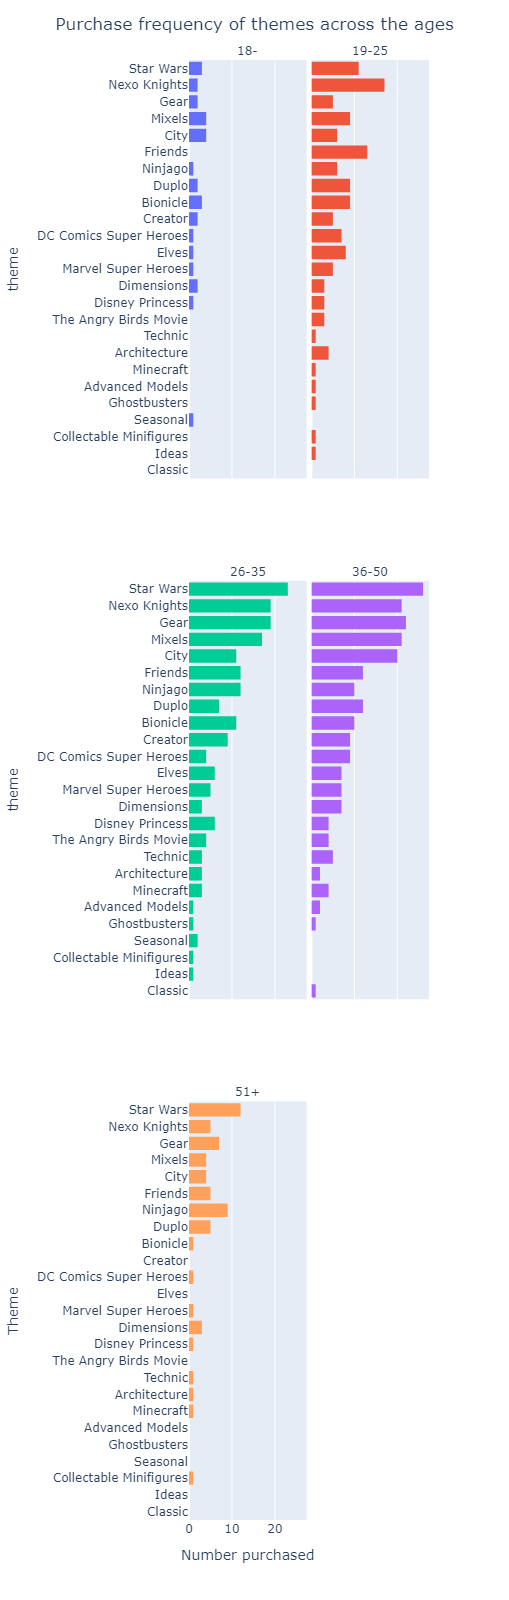

In [690]:
fig = px.histogram(DF[my_cols],
                   y = 'theme',
                   color = 'age_category',
                   facet_col = 'age_category',
                   facet_col_wrap = 2,
                   category_orders={'age_category' : ['18-', '19-25', '26-35', '36-50', '51+']})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
my_categories = ['Star Wars', 'Nexo Knights', 'Gear', 'Mixels', 'City', 'Friends',
       'Ninjago', 'Duplo', 'Bionicle', 'Creator', 'DC Comics Super Heroes',
       'Elves', 'Marvel Super Heroes', 'Dimensions', 'Disney Princess',
       'The Angry Birds Movie', 'Technic', 'Architecture', 'Minecraft',
       'Advanced Models', 'Ghostbusters', 'Seasonal',
       'Collectable Minifigures', 'Ideas', 'Classic']
my_categories.reverse()
fig.update_layout(title = 'Purchase frequency of themes across the ages',
                  title_x = 0.5,
                  xaxis_title = 'Number purchased',
                  yaxis_title = 'Theme',
                  yaxis={'categoryorder': 'array', 'categoryarray': my_categories},
                  showlegend = False,
                 
                  autosize=False,
                  width=800,
                  height=1600)
fig.show()

**In this sample, the age range 18- is more likely to buy from the City or Mixel theme, the age range 19-25 is more likely to buy from the Nexo Knights theme, and the age ranges 26-35, 36-50, and 51+ are more likely to buy from the Star Wars theme.**

## Essay Response

Give a brief report on what you are reading and what you have learned so far. If you chose your own articles please insert a link to the articles. If you chose a book, please give the book title and author.

1. What drew you to the book/articles
2. What have you learned so far.

eg. In the first chapter of the book the author talks about..... or My first article discusses..... or I disagree with what the author is saying so far.... or I really like what I am learning about because....

**I am reading “Weapons of Math Destruction” by Cathy O’Neil, a book that analyzes the potential dangers of implementing certain models in our society. I initially was drawn to this book because the pun in the title made me believe O’Neil’s writing style would be enjoyable to read. While reading, she exceeded my expectations. Her explanations are easy to comprehend and she makes the topics relatable to everyday life. For example, in chapter one, she claims her methodology of preparing meals for her family is a model, even if it is dynamic and only exists in her brain. It was interesting to think about models in a simplistic way, as basic as weighing other people’s preferences to make decisions.**

**Furthermore, in chapter one, O’Neil began emphasizing how models have already been ingrained into our society. She references baseball statistics, a model currently used to rank players and predict opposing players’ habits. O’Neil asserts that this is a healthy model because the information regarding the model is publicly available and the data is continuously updated. Also, there is not much danger involved, as its main impact is on how the sports match will play out.**

**Meanwhile, a recidivism model has detrimental effects on its victims. It uses a questionnaire for prisoners to determine their “risk” level and whether their sentence should be shortened. The questions, although cannot explicitly ask about race, are highly connected to experiences certain demographics face. Harsher treatment towards these individuals takes away their opportunities which leads them to be more likely to commit a crime once they are released. This creates a vicious loop where the model is believed to be successful despite influencing the outcomes to match its conclusions.**

**Another example of a toxic cycle is found in school systems. In struggling schools, standardized tests scores may be analyzed to evaluate teacher performance. Teachers have the potential of being fired if their class does not improve their test scores. But, this model does not take into consideration other variables, such as a student’s home life, or other markers of a teacher’s success, like parent testimonials.**

**I found it interesting how O’Neil mentioned that there is a seeming paradox regarding the validity of models compared to humans. Models are often definitively deemed “true” for using the data provided, even if there may be inaccuracies. On the other hand, humans must have concrete evidence if they ever hope to disprove a model’s results. Placing this much trust in a computer model is truly placing trust in its developers, as it is their biases that have a large influence on what the model outputs.**